# Assignment 2

The assignment 2 contains 3 questions and the due date is May 1 (Monday) 23:59PM.

## Question 1 Image Compression

In this question, you will work with images and apply KMeans for image compression, by reducing the number of colours that occur in an image to only those that are most common in that image.


### Question 1.1 (0 points)

To let you learn how Python work with images, plese complete this question.

### Black & white images

Each images represent a matrix where each pixel is an element of this matrix 
<img src="https://miro.medium.com/max/1386/1*bV7S0zACdidh11ikjYpLpQ.png">
The scale of colors is between 0 and 255 : 0 correspond to black and 255 to white

### Colored images
<img src="https://miro.medium.com/max/840/1*y0nV4cWk3KbzXSe9dIWL5g.jpeg">

Every color is a linear combinaison of primary colors : Red Green Blue <br/>
A colored image is somehow just the supperposition of three images : for each pixel with have three values




### Download images

We are using the famous [The CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) that consists of 60000 32x32 color images in 10 classes, with 6000 images per class. We need to donwload this dataset from tensorflow. If you have not installed tensorflow, please follow the [instllation guide](https://www.tensorflow.org/install) to get it or simply use Google colab for this assignment.




In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


By checking the shape, you will find the train set contains 50,000 images with the shape of (32, 32, 3) that indicates the image resolution with 3 color channels.

In [ ]:
x_train.shape

(50000, 32, 32, 3)

You can visually check a random image:

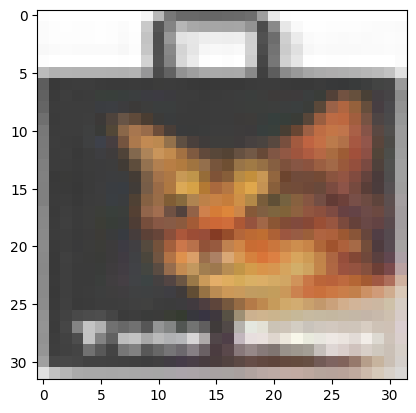

In [ ]:
plt.imshow(x_train[3000])

We can also check the image at each of three channels:

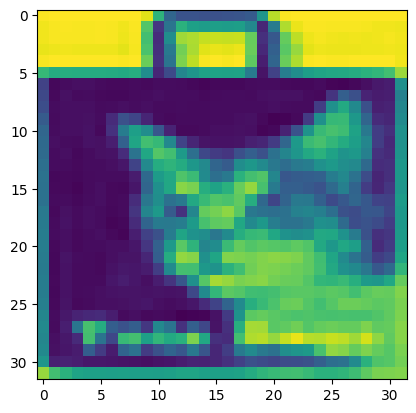

In [ ]:
plt.imshow(x_train[3000][:, :, 0])

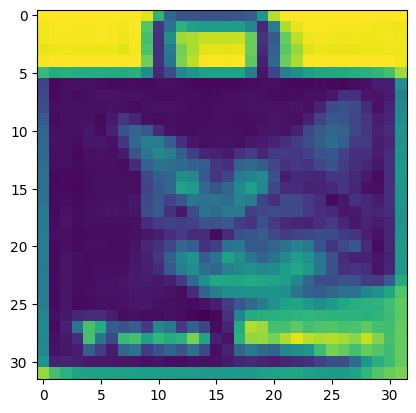

In [ ]:
plt.imshow(x_train[3000][:, :, 1])

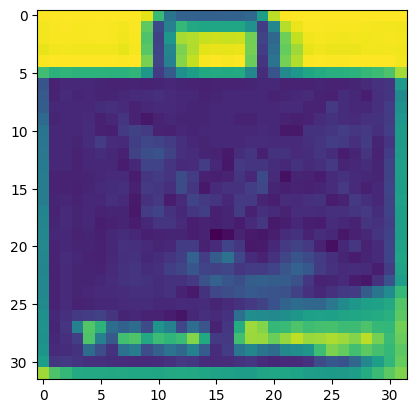

In [ ]:
plt.imshow(x_train[3000][:, :, 2])

We can convert a color image as a greyscale image using the NTSC formula: 0.299 ∙ Red + 0.587 ∙ Green + 0.114 ∙ Blue. This formula closely represents the average person's relative perception of the brightness of red, green, and blue light.

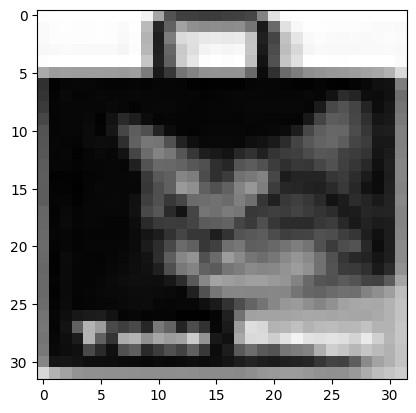

In [ ]:
R, G, B = x_train[3000][:,:,0], x_train[3000][:,:,1], x_train[3000][:,:,2]
imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
plt.imshow(imgGray, cmap='gray')

## 1.1 Importing libraries

In [ ]:
#importing necessary libraries 

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import os

# to make this notebook's output stable across runs
np.random.seed(42)

### Question 1.2 (10 points)

Convert all color images in x_train into greyscale images and use the sklearn.decomposition.PCA to perform principal component analysis to the dataset to reduce dimensions to 256. Then, reconstruct images from its reduced representation. Choose a image and see how it goes before and after the PCA using imread method. Explain your findings.  

**Hint** You may need to use numpy's reshape method to change the representation of each image as a vector before performing PCA and reshape it back as an image before you are able to visualize it.

## Converting all color images in x_train into greyscale images

In [ ]:
# Empty array to store the greyscale images
x_train_greyscale = np.empty((50000, 32, 32))

# Iterate through all images in x_train
for i in range(len(x_train)):
    R, G, B = x_train[i][:,:,0], x_train[i][:,:,1], x_train[i][:,:,2]
    imgGray = 0.299 * R + 0.587 * G + 0.114 * B
    x_train_greyscale[i] = imgGray

# Reshape the resulting greyscale images to 2D array (50000, 32*32)
x_train_greyscale_2d = x_train_greyscale.reshape(-1, 32 * 32)

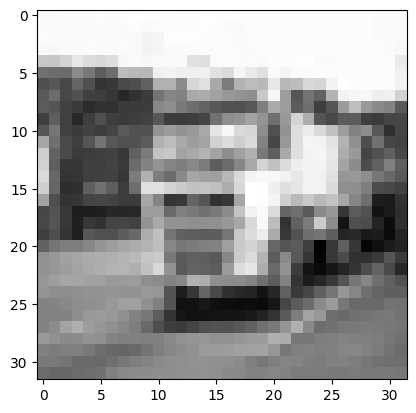

In [ ]:
# Image with index 1000 before performing PCA
plt.imshow(x_train_greyscale[1000],cmap="gray")

## Performing Dimensionality Reduction on 2D x_train array

In [ ]:
# performing PCA on the reshaped x_train_greyscale_2d
from sklearn.decomposition import PCA

pca = PCA(n_components=256)
x_train_reduced = pca.fit_transform(x_train_greyscale_2d)

In [ ]:
x_train_reduced.shape

(50000, 256)

## Reconstruct images and retrieve image with index 1000

In [ ]:
# Inverse transform the PCA-reduced data
x_train_inverse = pca.inverse_transform(x_train_reduced)

# Reshape the inverse-transformed data back to image dimensions (50000, 32, 32)
x_train_reconstructed = x_train_inverse.reshape(-1, 32, 32)

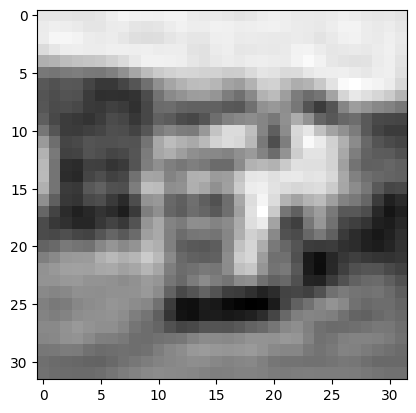

In [ ]:
#image with index 1000 after performing PCA
plt.imshow(x_train_reconstructed[1000],cmap="gray")

## Explanation question 1.2 
When comparing the original greyscale image and the reconstructed image after PCA, it can be seen that some details are lost in the reconstructed image. This is because PCA reduces the dimensions and keeps only the most significant components that explain the variance in the data. By doing this,  some information that is less significant is removed, which can lead to decreased quality in the reconstructed image. However, the advantage of PCA is that it allows for a more compact representation of the data and speeds up computations, making it an efficient dimensionality reduction technique.

### Question 1.3 (10 points)

Now explain which number of principal components should be chosen using Elbow method if PCA reaches 90% threshold of explained variance. Use the obtained number of principal components to reduce the image dimensions and again compare the reconstructed images from the previous step. Expalin your findings.

In [ ]:
# Determining the ideal number of principal components if PCA reaches 90% threshold of explained variance
pca_new = PCA()
pca_new.fit(x_train_greyscale_2d)
cumsum = np.cumsum(pca_new.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.90) + 1

In [ ]:
print("The number of principal components if PCA reaches 90% threshold of explained variance is",d)

The number of principal components if PCA reaches 90% threshold of explained variance is 76


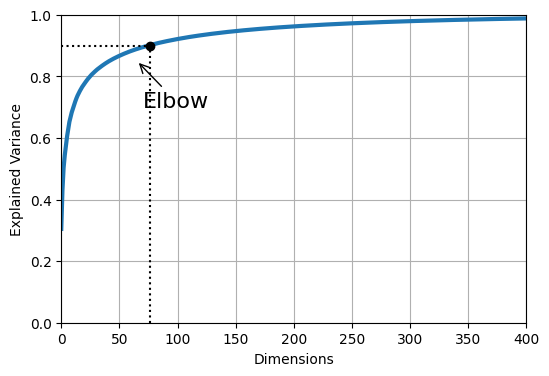

In [ ]:
# Demonstrating it with a plot from which the Elbow can be deduced
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.90], "k:")
plt.plot([0, d], [0.90, 0.90], "k:")
plt.plot(d, 0.90, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)

plt.show()

In [ ]:
# Initializing PCA with n_components = 76
pca_90 = PCA(n_components=d)
X_reduced = pca_90.fit_transform(x_train_greyscale_2d)

In [ ]:
# Reconstruct the images from the reduced representation with 76 dimensions
x_train_reconstructed_ideal = pca_90.inverse_transform(X_reduced)
x_train_reconstructed_ideal = x_train_reconstructed_ideal.reshape(-1, 32, 32, 1)

Text(0.5, 1.0, 'Reconstructed Image with 76 Dimensions')

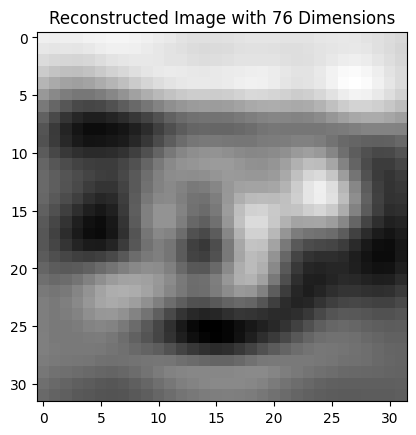

In [ ]:
# Display the reconstructed image after PCA with 76 dimensions
plt.figure()
plt.imshow(x_train_reconstructed_ideal[1000].squeeze(), cmap='gray')
plt.title('Reconstructed Image with 76 Dimensions')

## Explanation Question 1.3 

When comparing the reconstructed images with 256 and 76 dimensions, it can be seen that the reconstructed image with 76 dimensions (i.e., the ideal number of dimensions following 90% threshold of explained variance) shows more loss of detail compared to the reconstructed image with 256 dimensions. This is because fewer principal components capture less variance in the dataset, leading to more information loss during dimensionality reduction.

However, the reconstructed image with 76 dimensions still retains the overall structure of the original image. In other words, 76 principal components can capture 90% of the variance in the dataset, and the reduced representation might still be useful for certain applications where a more compact representation is desired.

The difference in quality between the reconstructed images with 256 and 76 dimensions reflects the trade-off between the compactness of the representation and the preservation of information. Using fewer dimensions results in a more compact representation and faster computations but may lead to more information loss (i.e., pictures with degraded quality).

### Question 1.4 (10 points)

Now build an image classifier of Logistic Regression (with default configuration) to predict the class of images using the original greyscale images and the compressed representations from PCA that explains 90% of variance. Use the 5-fold cross-validation to report the average macro-f1 test score (given this is a balanced dataset) and total fit time. Explain your findings.

Hint: y_train contains the uint8 value and cross-validate would not consider it as the label for classification. You need to convert the y_train into categorical values such that cross-validate would perform multi-class classification.

In [ ]:
# Converting y_train into categorical values 
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_categorical = label_encoder.fit_transform(y_train.squeeze())

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

# Performing logistic regression with default values on the original greyscale images
logistic_clf_original = LogisticRegression()
cv_results_original = cross_validate(logistic_clf_original, x_train_greyscale_2d, y_train_categorical, cv=5, scoring='f1_macro', return_train_score=True, n_jobs=-1)

# Performing logistic regression with default values on the compressed images
X_reduced_2d = X_reduced.reshape(-1, d)
logistic_clf_pca = LogisticRegression()
cv_results_pca = cross_validate(logistic_clf_pca, X_reduced_2d, y_train_categorical, cv=5, scoring='f1_macro', return_train_score=True, n_jobs=-1)

In [ ]:
# Computing average macro-f1 score and total fit time for cross validation for original greyscale images
original_mean_f1 = np.mean(cv_results_original['test_score'])
original_fit_time = np.sum(cv_results_original['fit_time'])

# Computing average macro-f1 score and total fit time for cross validation for compressed images
pca_mean_f1 = np.mean(cv_results_pca['test_score'])
pca_fit_time = np.sum(cv_results_pca['fit_time'])

In [ ]:
print(f"Original Greyscale Images:\nMean Macro-F1 Score: {original_mean_f1}\nTotal Fit Time: {original_fit_time}\n")
print(f"PCA Compressed Images explaining 90% of variance:\nMean Macro-F1 Score: {pca_mean_f1}\nTotal Fit Time: {pca_fit_time}\n")

Original Greyscale Images:
Mean Macro-F1 Score: 0.2795223405697033
Total Fit Time: 232.63150477409363

PCA Compressed Images explaining 90% of variance:
Mean Macro-F1 Score: 0.28740546777739606
Total Fit Time: 23.1483051776886



## Explanation Question 1.4

The average macro-F1 score for the PCA-compressed images (0.2874) is slightly higher than that of the original greyscale images (0.2795). This is striking as it was expected that performance would be worse with the reduced dimensions due to potential information loss. However, in this case, the PCA transformation has retained enough significant features to maintain or even slightly improve the classification performance.

The total fit time for the PCA-compressed images (23.15 seconds) is significantly shorter than that of the original greyscale images (232.63 seconds). This was expected because the reduced dimensions lead to a smaller input size for the logistic regression classifier, resulting in faster computation. The PCA transformation which explains 90% of variance has significanlty reduced the computational time.

Hence, the PCA transformation has not only reduced the computation time but also slightly improved the average macro-F1 score in this specific case. Conclusively, the PCA transformation has effectively retained the most relevant features for classification while removing irrelevant features, leading to better performance. 

### Question 1.5 (15 points)

Now let's work with the color images (with 3 channels) and again compress one image, this time by reducing numbers of colors using K-means. You need to cluster pixel values into **32 clusters** and choose the "mean color" to replace all the pixels in each cluster by this mean color. Show the original color image of cat and the mean color image of the same one. Explain your findings. 

Hint: each color pixel is represented by a 3D (R,G,B) vector, and the image would have 32x32 pixels. So you could find the mean color from the centroids of 32 clusters and update the pixels of image with the mean color.

Hint2: Once you have replaced the pixel values with mean color, you need to explicitly convert it into **uint type** such s uint8, uint16, etc, because the image pixel values can only be represented as integers or fractions.

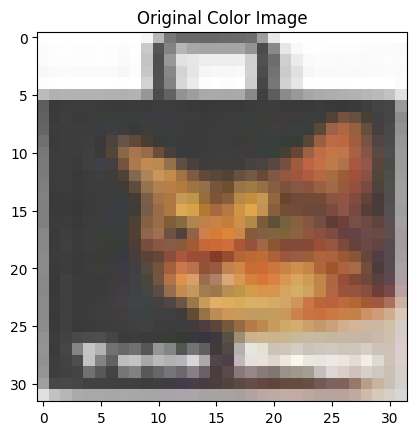

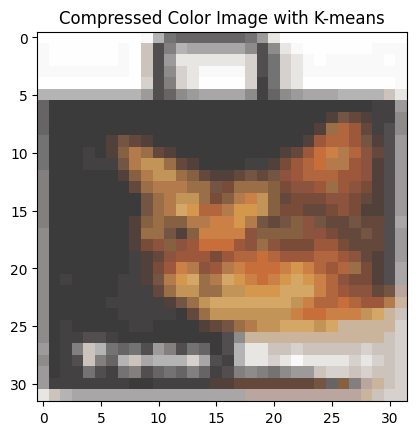

In [ ]:
from sklearn.cluster import KMeans

# Load the color image
color_image = x_train[3000]  # Assuming index 3000 is the image of a cat

# Reshape the image to a 2D array (32*32, 3)
pixels = color_image.reshape(-1, 3)

# Perform K-means clustering
kmeans = KMeans(n_clusters=32)
kmeans.fit(pixels)

# Replace each pixel with its cluster's mean color
compressed_pixels = kmeans.cluster_centers_[kmeans.labels_].astype('uint8')

# Reshape the compressed pixels back to the original image dimensions (32, 32, 3)
compressed_image = compressed_pixels.reshape(32, 32, 3)

# Display the original color image
plt.figure()
plt.imshow(color_image)
plt.title('Original Color Image')

# Display the compressed color image
plt.figure()
plt.imshow(compressed_image)
plt.title('Compressed Color Image with K-means')
plt.show()


## Explanation Question 1.5

By compressing the image using K-means, the number of unique colors is reduced to 32. This results in a smaller file size and less complexity for the image, which can be useful for faster processing. As the color palette was reduced, it was expected that some details in the compressed image with K-meas would be lost due to the limited range of colors, leading to a lower image quality compared to the original.

Strikingly, no difference between the original and compressed image of the cat can be detected. Consequently, the K-means algorithm has done a good job in selecting representative colors that closely match the original image. 

Conclusively, it is argued that even thought the color reduction is not noticeable to the human eye, the K-meas compression has been effective in reducing the image complexity and file size, while maintaining the overall structure and content of the picture.


## Question 2 Nova SBE Wikipedia 


In this question, you will work with time-series forecasting of page views of [Nova SBE's Wikipedia page](https://en.wikipedia.org/wiki/Nova_School_of_Business_and_Economics)  

When you click 'View history', you should see the backend of the wiki page and you can further select 'Pageviews' to have the statistics of page views of this page. Let's select the page views from all times (July 2015 to April 2023) at monthly level from users only (we exclude robot/spider views) and here is the [link](https://pageviews.wmcloud.org/?project=en.wikipedia.org&platform=all-access&agent=user&redirects=0&start=2015-07&end=2022-07&pages=Nova_School_of_Business_and_Economics) that allows you to get it directly. You can choose to download the data as csv or JSON file to work on.


In [ ]:
from google.colab import files

# Use the file upload widget to upload the CSV file
uploaded = files.upload()

# Read the uploaded CSV file into a pandas dataframe
pageview = pd.read_csv('pageviews.csv')

pageview

Saving pageviews.csv to pageviews (1).csv


,Date,Nova School of Business and Economics
0,2015-07,614
1,2015-08,675
2,2015-09,753
3,2015-10,703
4,2015-11,652
...,...,...
88,2022-11,1252
89,2022-12,887
90,2023-01,1203
91,2023-02,1128


In [ ]:
len(pageview)

93

In [ ]:
pageview['Date'] = pd.to_datetime(pageview['Date'])
pageview.set_index('Date', inplace=True)

<Axes: xlabel='Date'>

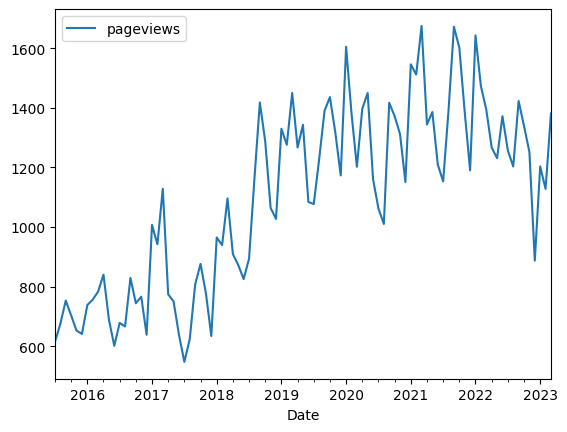

In [ ]:
pageview.rename(columns={'Nova School of Business and Economics':'pageviews'}, inplace=True)
pageview.plot()

### Question 2.1 Ensure Stationarity (10 points)

We will perform time-series forecasting and we need to ensure stationarity first. Perform [`Augmented Dick Fuller test`](https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html)and explain whether the pageview of wiki pages is stationary and would you be able to stationarize the data through first-order and second-order differencing (you can check the p-value and see if you achieve the statistical significance)?

Alternatively, you could also stationarize the pageview time series through deseasonlization. Perform seasonal decomposition using additive or multiplicative methods and explain whether you would achieve stationary time-series through seasonal decomposition?


In [ ]:
# Checking for stationarity of the original data
from statsmodels.tsa.stattools import adfuller
result = adfuller(pageview["pageviews"]) # p-value
print(f'p-value: {result[1]:.3f}')

p-value: 0.511


In [ ]:
# First order differencing
pageview['first_difference'] = pageview['pageviews'].diff()
result_first_diff = adfuller(pageview['first_difference'].dropna())
print(f"p-value: {result_first_diff[1]}")

p-value: 0.07188845593148417


In [ ]:
# Second order differencing
pageview['second_difference'] = pageview['first_difference'].diff()
result_second_diff = adfuller(pageview['second_difference'].dropna())
print(f"p-value: {result_second_diff[1]}")

p-value: 2.929742508093546e-07


## Explanation findings Question 2.1 - PART I

With ADF test we test the following hypothesis: H0: The series is not-stationary. Consequently, assuming a 5% significance level a p-value smaller than < 0.05 indicates stationarity. For the original pageview data the obtained p-value is 0.511. As the latter is larger than 0.05 we cannot reject the null hypothesis of non-stationarity. Therefore, based on these results, we can conclude that the time series is non-stationary.

Following the p-value of the ADF test after first-order differencing (0.072), it can be concluded that stationarity is still not achieved after performing first order differencing. However, the p-value of 2.930e-07 obtained through second-order differencing indicates that the latter is effective in stationarizing the data. Crucially, higher-order differencing can sometimes lead to over-differencing, which can result in a loss of useful information and reduced model performance. Therefore, 1st order is preferred. We might be able to achieve a signficant p-value with first-order differencing if we deseasonalize the data first.

## Additive deseasonalization

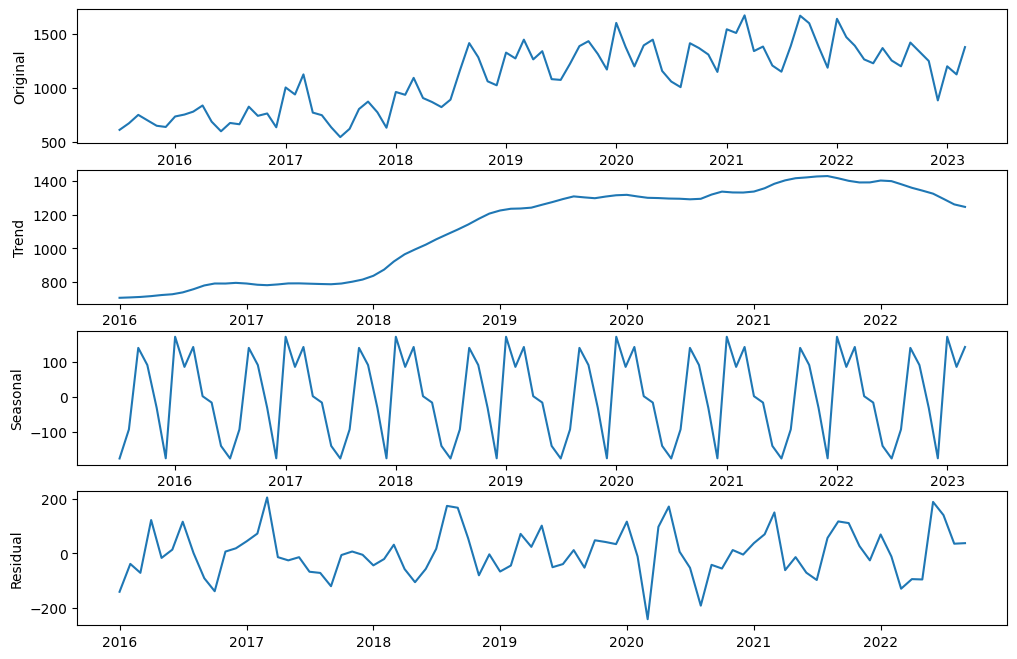

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition using the additive method with period=12 (from the plot yearly cycles can be deduced)
decomposition_add = seasonal_decompose(pageview['pageviews'], model='additive',period=12) 

# Plot the original time series and the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8))
ax1.plot(pageview.index, pageview['pageviews'])
ax1.set_ylabel('Original')
ax2.plot(pageview.index, decomposition_add.trend)
ax2.set_ylabel('Trend')
ax3.plot(pageview.index, decomposition_add.seasonal)
ax3.set_ylabel('Seasonal')
ax4.plot(pageview.index, decomposition_add.resid)
ax4.set_ylabel('Residual')
plt.show()


## Multiplicative deseasonalization

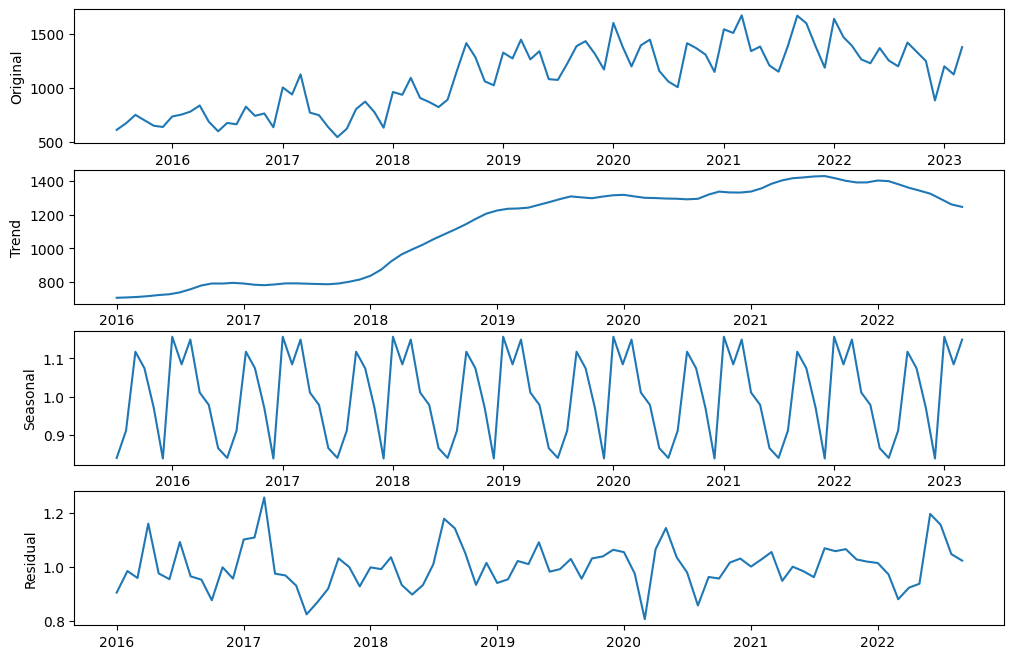

In [ ]:
decomposition_mult = seasonal_decompose(pageview['pageviews'], model='multiplicative',period=12)

# Plot the original time series and the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8))
ax1.plot(pageview.index, pageview['pageviews'])
ax1.set_ylabel('Original')
ax2.plot(pageview.index, decomposition_mult.trend)
ax2.set_ylabel('Trend')
ax3.plot(pageview.index, decomposition_mult.seasonal)
ax3.set_ylabel('Seasonal')
ax4.plot(pageview.index, decomposition_mult.resid)
ax4.set_ylabel('Residual')
plt.show()

## P-values after deseasonalization methods

In [ ]:
# appling ADF test to the residual component (representing the remaining part of the time series after removing the trend and seasonal components)
print('additive resid: ', adfuller(decomposition_add.resid.dropna())[1])
print('multiplicative resid: ', adfuller(decomposition_mult.resid.dropna())[1])

additive resid:  2.002569620245166e-07
multiplicative resid:  1.4582931952543747e-08


## Explanation Question 2.1 - Part II

The p-value for the additive model residual is 2.003-07.
The p-value for the multiplicative model residual is 1.458e-08. Both p-values are very small (less than 0.05), which indicates that H0 of the ADF test (i.e., the time series is non-stationary) can be rejected. This suggests that the residual components in both the additive and multiplicative models are stationary. Therefore, it can be concluded that we can achieve stationary time-series through seasonal decomposition.

### Question 2.2 Identify the hyperparameter (10 points)

Using the method from the previous section, we will preprocess the time series by deseasonalizing it (either additive or multiplicative) and identify the optimal hyperparameter of (p,d,q) for ARIMA model. Explain how would you find these hyperparameters. You could consider plotting autocorrelation and partial autocorrelation functions. 

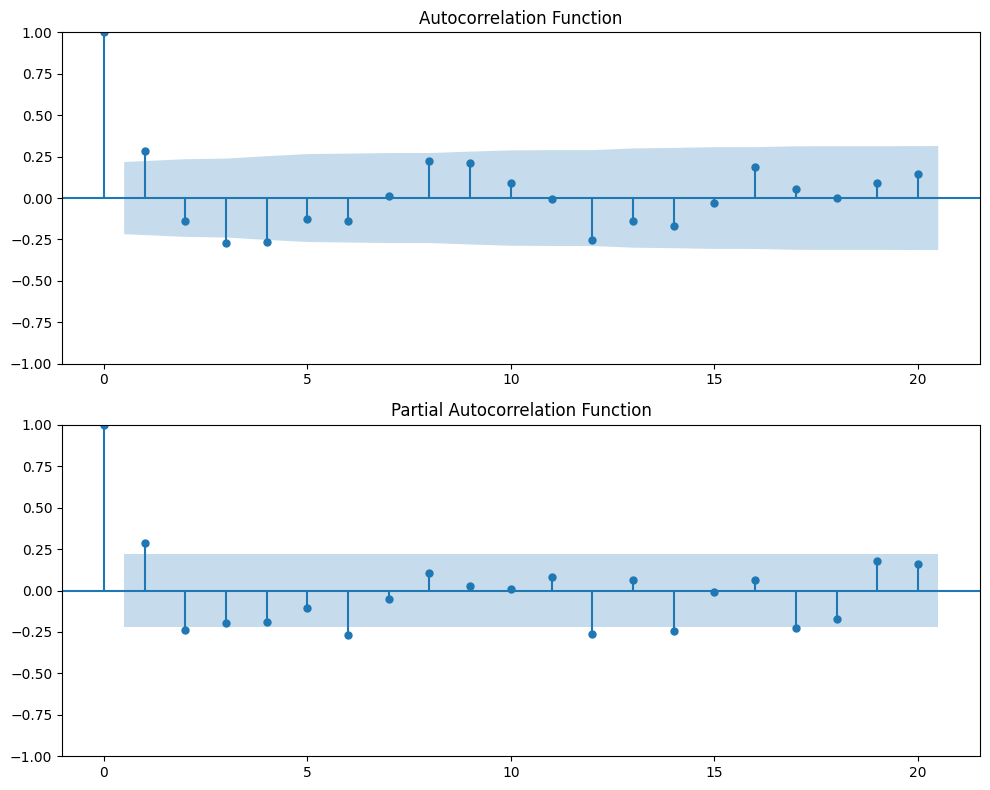

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

stationary_series = decomposition_add.resid.dropna()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# ACF plot
plot_acf(stationary_series, lags=20, ax=ax1)
ax1.set_title('Autocorrelation Function')

# PACF plot
plot_pacf(stationary_series, lags=20, ax=ax2)
ax2.set_title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()

## Explanation Question 2.2

AR(p): The autoregressive component order (p) is determined by the last lag before the correlation becomes statistically insignificant (i.e., enters the blue region). Following the PACF plot above, p = 2.

MA(q): Similarly, the moving average component order (q) is determined by the last lag before the correlation becomes statistically insignificant (i.e., enters the blue region). Following the ACF plot above, q = 1.

d: The order of differencing (d) should be set to 0 in this case, as stationary was already achieved using the seasonal_decompose function. Therefore, additional differencing is not necessary. 

Conclusively, the optimal ARIMA model combines an autoregressive process of order 2 (p), a moving average process of order 1 (q) and no differencing (d) to describe the stationarized time series data.These optimal hyperparameter values (p=2, d=0, q=1) can now be used to fit an ARIMA model.

## Check with gridsearch

In [ ]:
import warnings
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Function to evaluate an ARIMA model using a given order (p,d,q)
def evaluate_arima_model(data, order):
    split = int(len(data) * 0.8)
    train, test = data[0:split], data[split:]
    history = [x for x in train]
    
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    
    mse = mean_squared_error(test, predictions)
    return mse

# Function to perform grid search for ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order, mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

# Define the p, d, and q values to try
p_values = range(0, 4)
d_values = range(0, 2)
q_values = range(0, 4)

# Ignore warnings
warnings.filterwarnings("ignore")

# Find the optimal hyperparameters
evaluate_models(stationary_series, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=8436.191
ARIMA(0, 0, 1) MSE=6891.325
ARIMA(0, 0, 2) MSE=7176.151
ARIMA(0, 0, 3) MSE=7196.880
ARIMA(0, 1, 0) MSE=9824.137
ARIMA(0, 1, 1) MSE=8436.626
ARIMA(0, 1, 2) MSE=6867.441
ARIMA(0, 1, 3) MSE=7062.819
ARIMA(1, 0, 0) MSE=7283.540
ARIMA(1, 0, 1) MSE=6983.052
ARIMA(1, 0, 2) MSE=6640.614
ARIMA(1, 0, 3) MSE=6594.269
ARIMA(1, 1, 0) MSE=9986.975
ARIMA(1, 1, 1) MSE=7242.563
ARIMA(1, 1, 2) MSE=6953.240
ARIMA(1, 1, 3) MSE=7390.096
ARIMA(2, 0, 0) MSE=6801.350
ARIMA(2, 0, 1) MSE=6279.127
ARIMA(2, 0, 2) MSE=7491.188
ARIMA(2, 0, 3) MSE=6423.273
ARIMA(2, 1, 0) MSE=9644.413
ARIMA(2, 1, 1) MSE=6769.598
ARIMA(2, 1, 2) MSE=7726.214
ARIMA(2, 1, 3) MSE=7411.654
ARIMA(3, 0, 0) MSE=6514.912
ARIMA(3, 0, 1) MSE=6332.003
ARIMA(3, 0, 2) MSE=6534.686
ARIMA(3, 0, 3) MSE=5290.554
ARIMA(3, 1, 0) MSE=9292.630
ARIMA(3, 1, 1) MSE=6503.450
ARIMA(3, 1, 2) MSE=7123.365
ARIMA(3, 1, 3) MSE=6516.563
Best ARIMA(3, 0, 3) MSE=5290.554


### Question 2.3 Fit and forecast (10 points)

Now let's fit the ARIMA model using the identified hyperparameter of (p,d,q). Let's use the first 80% observations as the train set and remaining 20% observations as the test set 

Once you fit the model on the train set, you can make the forecast on the test set. Use the provided plot_forecast function to visulize the forecasted values and real values (together with 95% confidence interval). 

Lastly, report the mean absolute percentage error on the test set (you can use the sklearn implementation).

Hint: do not forget to add back the seasonality component to reconstruct the original pageview

In [ ]:
# Using the provided plot_forecast function from the lecture notebook 
def plot_forecast(fc, train, test, upper=None, lower=None):
    is_confidence_int = isinstance(upper, np.ndarray) and isinstance(lower, np.ndarray)
    # Prepare plot series
    fc_series = pd.Series(fc, index=test.index)
    lower_series = pd.Series(upper, index=test.index) if is_confidence_int else None
    upper_series = pd.Series(lower, index=test.index) if is_confidence_int else None

    # Plot
    plt.figure(figsize=(10,4), dpi=100)
    plt.plot(train, label='training', color='black')
    plt.plot(test, label='actual', color='black', ls='--')
    plt.plot(fc_series, label='forecast', color='orange')
    if is_confidence_int:
        plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8)

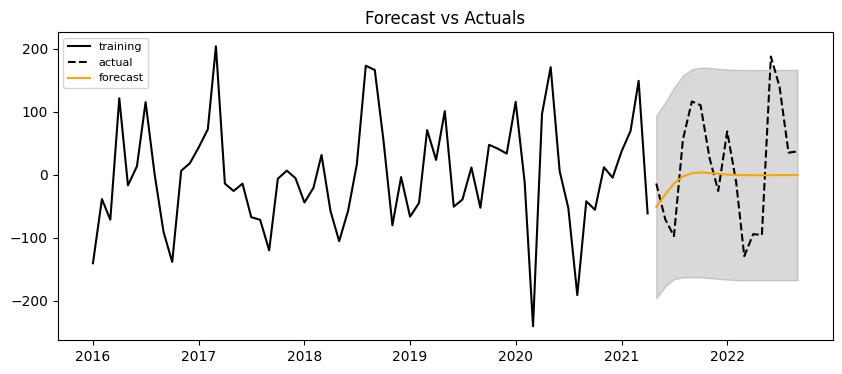

In [ ]:
# Split the data into train and test sets
split_index = int(len(stationary_series) * 0.8)
train = stationary_series.iloc[:split_index]
test = stationary_series.iloc[split_index:]

# Fit the ARIMA model
arima = ARIMA(train, order=(2, 0, 1), trend='c')
arima = arima.fit()

# Forecast the test set
forecast = arima.forecast(len(test), alpha=0.05)  # 95% confidence interval

# Get the confidence interval
ci = arima.get_forecast(len(test), alpha=0.05).conf_int()

# Plot the forecasted values, actual values, and confidence interval (without recomposition)
plot_forecast(forecast, train, test, upper=ci.iloc[:, 1].values, lower=ci.iloc[:, 0].values)


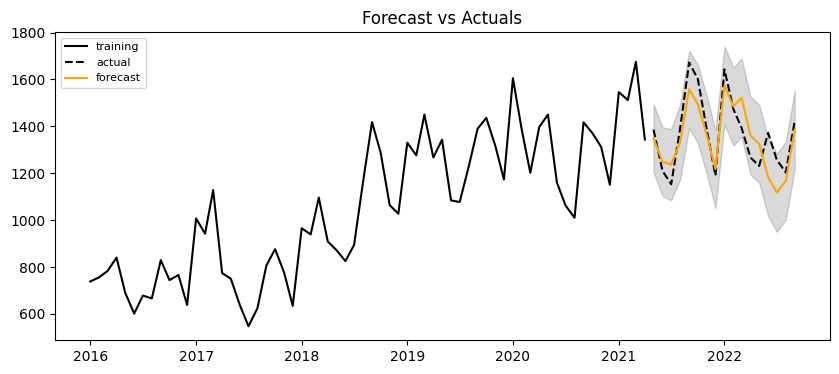

In [ ]:
# Re-compose back to initial TS
seasonal_component = decomposition_add.seasonal
trend_component = decomposition_add.trend

forecast_index = test.index
seasonal_forecast = seasonal_component[forecast_index]
trend_forecast = trend_component[forecast_index]
recomposed_forecast = forecast + seasonal_forecast + trend_forecast

train_index = train.index
seasonal_train = seasonal_component[train_index]
trend_train = trend_component[train_index]
recomposed_train = train + seasonal_train + trend_train

test_index = test.index
seasonal_test = seasonal_component[test_index]
trend_test = trend_component[test_index]
recomposed_test = test + seasonal_test + trend_test

# Recompose upper and lower bounds
conf_int = arima.get_forecast(len(test)).conf_int(alpha=0.05)
lower_bound = pd.Series(conf_int.iloc[:, 0].values, index=forecast_index)
upper_bound = pd.Series(conf_int.iloc[:, 1].values, index=forecast_index)

recomposed_upper_bound = upper_bound + seasonal_forecast + trend_forecast
recomposed_lower_bound = lower_bound + seasonal_forecast + trend_forecast

lower_series = recomposed_lower_bound.values
upper_series = recomposed_upper_bound.values

# Plot the recomposed forecast and actuals
plot_forecast(recomposed_forecast, recomposed_train, recomposed_test, upper_series, lower_series)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

# Compute the mean absolute percentage error on the test set
mape = mean_absolute_percentage_error(recomposed_test, recomposed_forecast)
print(f"Mean Absolute Percentage Error (MAPE) on the test set: {mape:.2%}")


Mean Absolute Percentage Error (MAPE) on the test set: 5.56%


## Question 3 Birds of a feather sing together


In this question, you will work with movie ratings to build a recommender system just like Netflix, Youtube, etc.


__Load the datasets in three different pandas dataframes `movies`, `tags` and `ratings`.__


In [ ]:
movies = pd.read_csv('movies.csv')
tags = pd.read_csv('tags.csv')
ratings = pd.read_csv('ratings.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Let's filter the ratings dataframe, to have only movies that have received a rating:

In [ ]:
movies['genres'] = movies['genres'].str.replace('|',' ')
movies = movies[movies.movieId.isin(ratings.movieId.unique().tolist())]
movies.shape

(9724, 3)

In [ ]:
num_unique_movies = tags["movieId"].nunique()

print("Number of unique movies:", num_unique_movies)

Number of unique movies: 1572


In [ ]:
movies["genres"].isna().sum().sum()

0

In [ ]:
tags["tag"].isna().sum().sum()

0

### Question 3.1 (10 points) Content-based recommender system

We create a new feature called metadata, that merges all the text data information we have about a movie : the genre and the tags. So the merged dataframe should contain at least the following columns: *movieId, title and metadata*.

Then, construct the vectorized reprentation of metadata using sklearn's Countvectorizer to transform the metadata into vectors. Learn the latent matrix from the metadata vector using [truncated SVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html) with 50 dimensions. With the generated latent matrix, identify the top 10 most relevant movies for **"Toy Story (1995)"** by calculating the cosine similairty and finding movies with the highest similarity score. 



In [ ]:
# first merge the frames with an outer join to evaluate the number of missing values in genre and tags columns
movies_tags = pd.merge(movies, tags, on='movieId',how="outer")

In [ ]:
movies_tags.shape

(11853, 6)

In [ ]:
# check for missing values in the tags column
movies_tags["tag"].isna().sum().sum()

8170

In [ ]:
# check for missing values in the genres column
movies_tags["genres"].isna().sum().sum()

21

## Performing left join on movies in order to maintain the 8170 movies that have a genre(s) but no tag 


In [ ]:
# merge the frames and create a metadata column 
movies_tags = pd.merge(movies, tags, on='movieId',how="left")

# Create a new column called 'metadata' that merges the 'genres' and 'tag' columns
movies_tags['metadata'] = movies_tags['genres'] + ' ' + movies_tags['tag']

# Fill missing values so that the metadata column can be vectorized 
movies_tags['metadata'] = movies_tags['metadata'].fillna('')

# Select only relevant columns 
movies_tags = movies_tags.loc[:, ['movieId', 'title', 'metadata']]

# Remove duplicates by grouping by movieId
grouped = movies_tags.groupby(['movieId','title']).agg({'metadata': ' '.join})
grouped = movies_tags.groupby(['movieId','title']).agg({'metadata': lambda x: ' '.join(x).lower()})
grouped.reset_index(inplace=True)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate the CountVectorizer with custom settings if needed
vectorizer = CountVectorizer()

# Fit and transform the metadata column to create a sparse matrix
metadata_matrix = vectorizer.fit_transform(grouped['metadata'])

## Double check optimal number of dimensinos with GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

# Initialize the count vectorizer and fit it to the 'metadata' column for each movie
vectorizer = CountVectorizer()
metadata_vectorized = vectorizer.fit_transform(grouped['metadata'])

# Define a function to calculate the average cosine similarity for the top 10 recommendations
def average_cosine_similarity(n_components, metadata_vectorized, toy_story_vector):
    svd = TruncatedSVD(n_components=n_components, random_state=42)
    metadata_svd = svd.fit_transform(metadata_vectorized)
    cosine_similarities = cosine_similarity(toy_story_vector, metadata_svd)
    top_10_similarities = np.partition(cosine_similarities[0], -11)[-11:-1]
    average_similarity = np.mean(top_10_similarities)
    return average_similarity

# Define the range of possible dimensions (components) for Truncated SVD
param_grid = {'n_components': range(1, 101)}

# Perform grid search with the specified parameter grid
grid_search = GridSearchCV(estimator=TruncatedSVD(random_state=42),
                           param_grid=param_grid,
                           scoring=lambda estimator, X, y=None: average_cosine_similarity(
                               estimator.n_components, X, toy_story_vector),
                           n_jobs=-1)
grid_search.fit(metadata_vectorized)

# Print the best number of dimensions (components) found by grid search
print("Best number of dimensions (components):", grid_search.best_params_['n_components'])

Best number of dimensions (components): 50


## Learn the latent matrix from the metadata vector using truncated SVD with 50 dimensions, and identify the top 10 most relevant movies for "Toy Story (1995)" 

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Fit and transform the metadata column to create a sparse matrix
metadata_matrix = vectorizer.fit_transform(grouped['metadata'])

# Instantiate the TruncatedSVD with 50 components
svd = TruncatedSVD(n_components=50)

# Fit the TruncatedSVD with the metadata_matrix
svd.fit(metadata_matrix)

# Transform the metadata_matrix to obtain the latent matrix
latent_matrix = svd.transform(metadata_matrix)

# Calculate cosine similarity between the latent matrix and the vector corresponding to "Toy Story (1995)"
cosine_similarities = cosine_similarity(latent_matrix)

# Get the index of "Toy Story (1995)"
toy_story_index = grouped[grouped['title'] == 'Toy Story (1995)'].index[0]

# Get the similarity scores for "Toy Story (1995)"
toy_story_similarities = cosine_similarities[toy_story_index]

# Find the top 10 most relevant movies based on the highest similarity scores
top_10_movie_indices = np.argsort(toy_story_similarities)[-11:-1][::-1]

# Get the top 10 most relevant movies
top_10_movies = grouped.iloc[top_10_movie_indices]

# Get the top 10 similarity scores
top_10_similarity_scores = toy_story_similarities[top_10_movie_indices]

# Combine the movies and their similarity scores in a DataFrame
top_10_movies_with_scores = pd.DataFrame({
    'title': top_10_movies['title'],
    'similarity_score': top_10_similarity_scores
})

# Display the top 10 movies along with their similarity scores
print(top_10_movies_with_scores)

                                                  title  similarity_score
2353                                 Toy Story 2 (1999)          0.996583
3189                                       Shrek (2001)          0.912404
8339                              The Lego Movie (2014)          0.911134
1756                               Bug's Life, A (1998)          0.897080
4418            Sinbad: Legend of the Seven Seas (2003)          0.895780
4354                                Finding Nemo (2003)          0.889299
1576                      Lord of the Rings, The (1978)          0.885870
5667  Lemony Snicket's A Series of Unfortunate Event...          0.881430
559                                    Space Jam (1996)          0.844577
5998  Wallace & Gromit in The Curse of the Were-Rabb...          0.825293


### Question 3.2 (10 points) Collaborative filtering recommender system

Similarly, let's creat a latent matrix for ratings and also show the top 10 most relevant movies that receive similar ratings. 




In [ ]:
# Pivot the ratings DataFrame to create a movie-user matrix
movie_user_matrix = ratings.pivot_table(index='movieId', columns='userId', values='rating')

# Fill missing values with zeros
movie_user_matrix.fillna(0, inplace=True)

# Instantiate the TruncatedSVD with 50 components
svd = TruncatedSVD(n_components=50)

# Fit and transform the movie-user matrix to obtain the latent matrix
latent_matrix_ratings = svd.fit_transform(movie_user_matrix)

# Calculate cosine similarity between the latent matrix and the vector corresponding to "Toy Story (1995)"
cosine_similarities_ratings = cosine_similarity(latent_matrix_ratings)

# Get the index of "Toy Story (1995)" in the movie_user_matrix
toy_story_index_ratings = movie_user_matrix.index.get_loc(1)

# Get the similarity scores for "Toy Story (1995)"
toy_story_similarities_ratings = cosine_similarities_ratings[toy_story_index_ratings]

# Find the top 10 most relevant movies based on the highest similarity scores
top_10_movie_indices_ratings = np.argsort(toy_story_similarities_ratings)[-11:-1][::-1]

# Get the movieIds of the top 10 most relevant movies
top_10_movieIds_ratings = movie_user_matrix.iloc[top_10_movie_indices_ratings].index

# Get the corresponding movie titles from the movies DataFrame
top_10_movies_ratings = movies[movies['movieId'].isin(top_10_movieIds_ratings)]

# Get the top 10 similarity scores
top_10_similarity_scores_ratings = toy_story_similarities_ratings[top_10_movie_indices_ratings]

# Combine the movies and their similarity scores in a DataFrame
top_10_movies_with_scores_ratings = pd.DataFrame({
    'title': top_10_movies_ratings['title'].values,
    'similarity_score': top_10_similarity_scores_ratings
})

# Display the top 10 movies along with their similarity scores
print(top_10_movies_with_scores_ratings)

                                       title  similarity_score
0  Star Wars: Episode IV - A New Hope (1977)          0.794724
1                      Lion King, The (1994)          0.793304
2                       Jurassic Park (1993)          0.788680
3                             Aladdin (1992)          0.786591
4                 Mission: Impossible (1996)          0.773134
5       Independence Day (a.k.a. ID4) (1996)          0.769456
6                       Groundhog Day (1993)          0.766473
7                  Back to the Future (1985)          0.750165
8                       Bug's Life, A (1998)          0.749835
9                         Toy Story 2 (1999)          0.749476


### Question 3.3 (5 points) Hybrid recommender system

Similarly, let's build a hybrid recommender system and also show the top 10 most relevant movies that calculate the average measure of both content and collaborative.


In [ ]:
# Calculate the cosine similarity between the two latent matrices
hybrid_similarity = cosine_similarity(latent_matrix, latent_matrix_ratings)

# Take the average of the similarity scores
hybrid_similarity_avg = np.mean([cosine_similarities, cosine_similarities_ratings], axis=0)

# Get the index of "Toy Story (1995)" in the movie_user_matrix
toy_story_index = movie_user_matrix.index.get_loc(1)

# Get the similarity scores for "Toy Story (1995)" from the hybrid system
toy_story_similarities = hybrid_similarity_avg[toy_story_index]

# Find the top 10 most relevant movies based on the highest similarity scores
top_10_movie_indices = np.argsort(toy_story_similarities)[-11:-1][::-1]

# Get the movieIds of the top 10 most relevant movies
top_10_movieIds = movie_user_matrix.iloc[top_10_movie_indices].index

# Get the corresponding movie titles from the movies DataFrame
top_10_movies = movies[movies['movieId'].isin(top_10_movieIds)]

# Get the top 10 similarity scores
top_10_similarity_scores = toy_story_similarities[top_10_movie_indices]

# Combine the movies and their similarity scores in a DataFrame
top_10_movies_with_scores = pd.DataFrame({
    'title': top_10_movies['title'].values,
    'similarity_score': top_10_similarity_scores
})

# Display the top 10 movies along with their similarity scores
print(top_10_movies_with_scores)

                                    title  similarity_score
0                          Jumanji (1995)          0.894943
1                          Aladdin (1992)          0.827960
2                        Space Jam (1996)          0.823278
3  Monty Python and the Holy Grail (1975)          0.786999
4                    Bug's Life, A (1998)          0.763840
5         Who Framed Roger Rabbit? (1988)          0.735676
6                      Toy Story 2 (1999)          0.731537
7                            Shrek (2001)          0.728192
8                     Finding Nemo (2003)          0.722149
9                 Incredibles, The (2004)          0.717231
